<a href="https://colab.research.google.com/github/rudraksh97/Generative-Art/blob/master/experiment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [0]:
x_bounds = np.array([0, 10])
y_bounds = np.array([0, 10])
x_buffer, y_buffer = 1, 1
x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

In [0]:
num_points = 200

In [0]:
x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
pts = np.hstack([x, y])

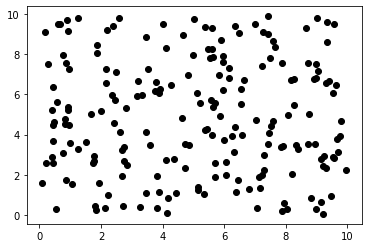

In [124]:
plt.scatter(*pts.transpose(),c = '#000000')
plt.show()

In [0]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

In [126]:
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]
print(len(shapes))

188


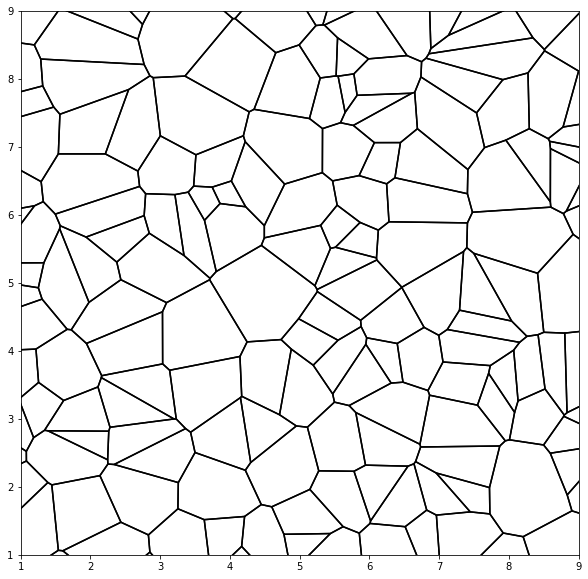

In [127]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes,colors="#000000")
ax.add_collection(lc)

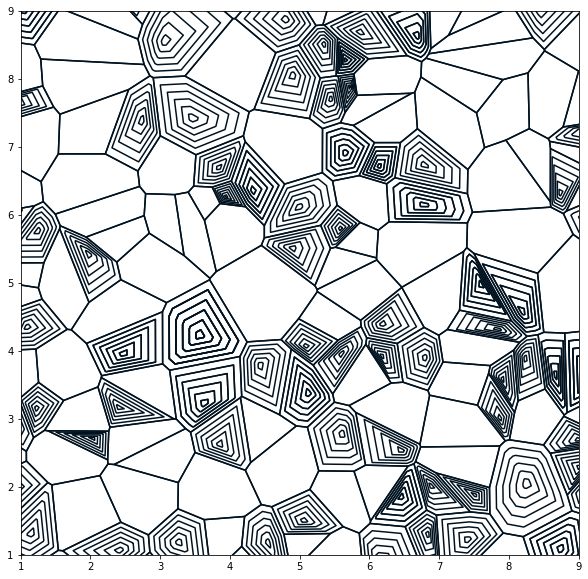

In [128]:
filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

num_polygons = 120
lst = np.random.randint(low=0, high=len(shapes)-1, size=num_polygons)

for i in lst:
  center = np.mean(shapes[i],axis=0)
  polygon = shapes[i]
  for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
      scaled = scaler*(polygon - center) + center
      filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(filled_polygon,colors="#001220")
ax.add_collection(lc)
plt.show()

In [0]:
fig.savefig('experiment1.png', bbox_inches = 'tight', pad_inches = 0)